# Visualização da Informação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
URL_DATASET = "https://www.kaggle.com/api/v1/datasets/download/adilshamim8/cost-of-international-education"

In [14]:
df = pd.read_csv(URL_DATASET, compression="zip")
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


Corrigir tipos de dados

In [4]:
df["Data"] = pd.to_datetime(df["Data"], dayfirst=True)
df.head()

,Data,USD_BRL
0,2019-12-31,4.0195
1,2019-12-30,4.0195
2,2019-12-27,4.0460
3,2019-12-26,4.0560
4,2019-12-25,4.0838


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     2608 non-null   datetime64[ns]
 1   USD_BRL  2608 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 KB


Análise inicial de estatística básica

In [6]:
df["USD_BRL"].describe()

count    2608.000000
mean        2.751703
std         0.839616
min         1.538300
25%         1.985350
50%         2.653100
75%         3.477100
max         4.263800
Name: USD_BRL, dtype: float64

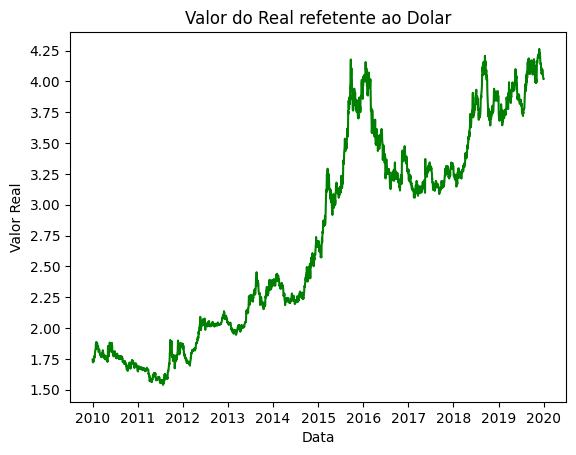

In [7]:
x = df["Data"].values
y = df["USD_BRL"].values

fig, ax = plt.subplots()

ax.set_title("Valor do Real refetente ao Dolar")
ax.set_xlabel("Data")
ax.set_ylabel("Valor Real")

ax.set_yticks(np.arange(1.5, 4.5+0.25, 0.25))

ax.plot(x, y, color="g")

plt.show()

In [8]:
df["Ano"] = df["Data"].dt.year
dfByYear = df.groupby(["Ano"], as_index=False).mean()[["Ano", "USD_BRL"]]
dfByYear

,Ano,USD_BRL
0,2010,1.759219
1,2011,1.674485
2,2012,1.954631
3,2013,2.159236
4,2014,2.354403
5,2015,3.336008
6,2016,3.483567
7,2017,3.192651
8,2018,3.654683
9,2019,3.945705


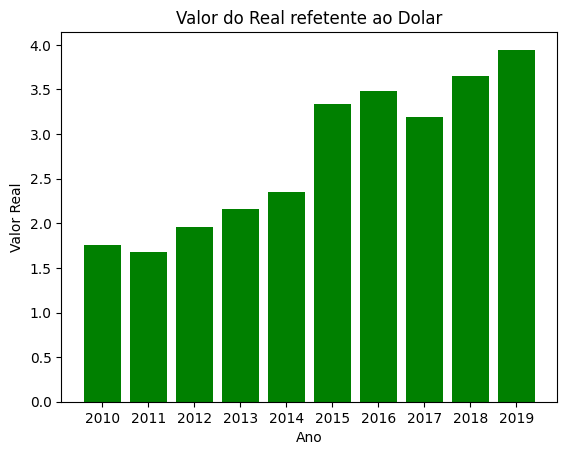

In [9]:
x = dfByYear["Ano"]
y = dfByYear["USD_BRL"]


fig, ax = plt.subplots()

ax.set_title("Valor do Real refetente ao Dolar")
ax.set_xlabel("Ano")
ax.set_ylabel("Valor Real")

ax.set_xticks(range(2010,2020))

ax.bar(x, y, color="g")
plt.show()